<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/inlineVSquads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2

from sklearn.neighbors import KNeighborsClassifier

print(tf.__version__)

2.3.0


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 111.webp to 111.webp
Saving 113.webp to 113.webp
Saving 114.webp to 114.webp
Saving 115.webp to 115.webp
Saving 116.webp to 116.webp
Saving 117.webp to 117.webp
Saving in 40.jpg to in 40.jpg
Saving in1.jpg to in1.jpg
Saving in2.jpg to in2.jpg
Saving in3.jpg to in3.jpg
Saving in4.jpg to in4.jpg
Saving in5.jpg to in5.jpg
Saving in6.jpeg to in6.jpeg
Saving in7.jpg to in7.jpg
Saving in8.jpg to in8.jpg
Saving in9.jpg to in9.jpg
Saving in10.png to in10.png
Saving in11.jpg to in11.jpg
Saving in12.jpg to in12.jpg
Saving in13.jpg to in13.jpg
Saving in14.jpg to in14.jpg
Saving in15.jpg to in15.jpg
Saving in16.png to in16.png
Saving in17.jpg to in17.jpg
Saving in18.jpg to in18.jpg
Saving in19.jpg to in19.jpg
Saving in20.jpg to in20.jpg
Saving in21.jpg to in21.jpg
Saving in22.jpg to in22.jpg
Saving in23.jpg to in23.jpg
Saving in24.jpeg to in24.jpeg
Saving in25.jpg to in25.jpg
Saving in26.jpg to in26.jpg
Saving in27.jpg to in27.jpg
Saving in28.jpg to in28.jpg
Saving in29.webp to in29.webp
Sa

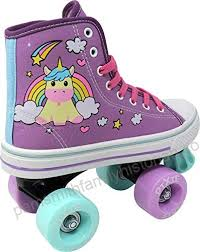

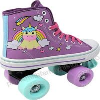

In [3]:
from google.colab.patches import cv2_imshow

img = cv2.imread('q150.jfif')
cv2_imshow(img)
img = cv2.resize(img,(100,100))  
cv2_imshow(img)

In [5]:
import os 
import cv2
local_download_path = os.path.expanduser('/content/')

labels = []
images = []

for file in os.listdir(local_download_path):

    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
       img = cv2.imread(file)
       img = cv2.resize(img,(100,100))     
       images.append(img)

       if file[0] == "q":
           labels.append(0)
       else:
           labels.append(1)

images = np.array(images)
labels = np.array(labels)

In [6]:
print(images.shape)
print(labels.shape)


image = cv2.imread("in1.jpg")
print("Max intensity of pixels is: %d and minimal intensity is: %d " %(image.max(),image.min()))

(261, 100, 100, 3)
(261,)
Max intensity of pixels is: 255 and minimal intensity is: 0 


In [7]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state = 20)


nb_classes = 2
y_train = np.array(y_train)
y_test = np.array(y_test)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [94]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [95]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)


IMG_SHAPE = (100,100) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [96]:
base_model.trainable = False


In [97]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 101, 101, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 50, 50, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [99]:
image_batch, label_batch = next(iter(X_train))
feature_batch = base_model(image_batch)

ValueError: ignored

In [98]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

NameError: ignored

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

In [101]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

NameError: ignored

In [100]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


NameError: ignored

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)